In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable

from PIL import Image

In [2]:
image_path = '../knee-xrays/data/smith_profix_1/Smith _ Nephew Profix (Implant 4279).jpg'

In [3]:
%%time
rn50_model = models.resnet50(pretrained=True)
# model = model.cuda()
rn50_model.eval()
# layer = rn34_model._modules.get('avgpool')

Wall time: 609 ms


In [4]:
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [5]:
class FeatureExtract(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.features = nn.Sequential(
            *list(base_model.children())[:-1]
        )
    def forward(self, x):
        x = self.features(x)
        return x

model = FeatureExtract(rn50_model)

In [6]:
def load_img(image_path):
    img = Image.open(image_path)
    t_img = Variable(normalize(to_tensor(scaler(img))))
#     print(t_img.shape)
    t_img = t_img.unsqueeze(0)
#     print(t_img.shape)
    return t_img

In [7]:
vector_1 = model(load_img(image_path))

In [8]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)

In [9]:
def similarity(source_img_path, target_vec, sim_fn):
    t_img = load_img(source_img_path)
    if t_img.shape[1] != 3:
        return 0.0
    source_vec = model(t_img)
    return float(sim_fn(source_vec, target_vec)[0][0][0].data.cpu().numpy())

In [10]:
similarity(image_path, vector_1, cos)

1.0000003576278687

In [11]:
from pathlib import Path

In [12]:
source_dir = Path('../knee-xrays/data/smith_profix_1/output/')

In [13]:
%%time
for image_path in source_dir.iterdir():
    sim_val = similarity(image_path, target_vec=vector_1, sim_fn=cos)
    print(f'{image_path.stem},{sim_val}')

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_025e7471-f6e7-407b-8e25-ec12494dbb7a,0.8064627051353455
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_027ae3ea-308f-429a-9d59-99030c7afd0d,0.9401986598968506
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_02859fc1-c4af-4bc6-be98-f75f27be6d8a,0.8954764008522034
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_029e8aa7-b04c-4a12-bb31-dcc359ff4bb3,0.9019478559494019
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_02cf0c6d-f854-435b-b7da-908f94972369,0.8495535850524902
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_02f8656a-372f-4363-9f63-84e18b95da10,0.9628711342811584
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_035bf1f6-3458-4222-88a3-009694ab9b3d,0.9268779754638672
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_04205afc-ec5d-48c0-9d91-51bd6af3c31e,0.8122707009315491
smith_profix_1_original_Smith _ 

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_10f26dc5-5210-4320-8ebe-658ea618d809,0.9105939269065857
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_10fa9f8e-2162-490c-81ed-0ada648c7103,0.9746392965316772
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_11111f5c-bac4-4828-9d74-2314fa9cc192,0.7420477867126465
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_11ba3a97-913a-4496-bda4-86abaaab5326,0.8204209804534912
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_12fc9806-21a8-41b6-bac1-59266eefc856,0.9189025163650513
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_1344a536-2a49-4b82-a4c2-781b4146a29e,0.9343319535255432
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_1373904d-a1b7-402a-907e-17c1a9bad548,0.91884446144104
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_13a482b0-5a17-4424-b56e-7af9472a4cda,0.8682745695114136
smith_profix_1_original_Smith _ Ne

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_2260ae7f-c332-4d8e-8c97-fde604a361db,0.9706134796142578
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_2268502a-7195-4509-80dc-a1cb4a25f7fd,0.9276387095451355
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_229dc637-3dc0-4b74-b3c3-fc0fa23c3a09,0.9320494532585144
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_22b51620-ec4e-458a-80ce-6e9027a23cf0,0.8621845841407776
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_22bd8ae2-bed2-484e-9add-53ea4536a4c9,0.7155847549438477
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_23149065-745b-4cdf-bcd9-54da82002c52,0.951918363571167
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_232071a8-653b-4867-a65c-1e784c97e4eb,0.9078388810157776
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_232d9f1e-af95-4550-a740-902fea749afd,0.9956896901130676
smith_profix_1_original_Smith _ N

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_32b7aa00-8c17-46e6-b88f-c350a664ea15,0.9624791741371155
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_32ea8262-54cc-4b30-b012-e10fa823314d,0.8587502837181091
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_33297215-2afb-4ba5-89c7-ea1e7cca89cc,0.842663586139679
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_33a158b0-d272-4b52-9e95-b36e7164e09e,0.803054690361023
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_33f5f960-5e69-4ccc-83bd-63a8ac7b99d3,0.9313147068023682
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_348e4d43-3e24-4dbd-a2d1-9bc3cb22a9d2,0.8739988803863525
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_352b545f-0f35-4e61-bd1d-d992e2f04557,0.9433239102363586
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_352b57fc-44c4-4ca7-aa23-c2ec7bb7083f,0.9137514233589172
smith_profix_1_original_Smith _ Ne

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_42414659-0cde-449d-a85f-5cc42b9df7d9,0.8685780763626099
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_429806cf-0907-427a-b530-a1d5d00a1978,0.848153829574585
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_42cfcc17-247a-4f0f-9aa3-dfcf6d9400af,0.9171627163887024
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_42dc6a45-b387-457d-afd9-f8d9f3689225,0.9255990386009216
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_43003f1d-1699-4abe-97dc-8a5c188ecc93,0.9081763029098511
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_4345c794-eccd-4cae-bea1-9c9f33aa3283,0.9776363968849182
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_442bceaa-879c-40c6-8ca4-a83fb23697bc,0.8855577111244202
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_44399615-9461-432f-b04a-7fa3abc6d449,0.8958795666694641
smith_profix_1_original_Smith _ N

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_54dc27bf-c14b-4d67-b0ce-5b1945533ce8,0.8433643579483032
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_550f1ad7-c932-40b5-9c6d-8b23df267175,0.928139865398407
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_553dd314-1c4b-4bb8-8479-df4c389e08f3,0.8595779538154602
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_555ca486-3714-4eb2-aaab-7e461cf110c1,0.7766798138618469
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_56132422-e329-426c-bf79-5918f0f55171,0.9132347106933594
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_56d1df74-db23-48ae-b88a-6f3704b83a4f,0.9315840601921082
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_56da1ef1-5e9b-4fed-be23-44870202971b,0.8054884672164917
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_5703e3a3-a6ee-4dad-9096-c0a1dc510b9e,0.9369997382164001
smith_profix_1_original_Smith _ N

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_672de400-7b70-4ee6-8bb9-0716b0efac1a,0.9631024599075317
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_6730d193-110f-4a93-9ff2-410e88bf54c9,0.9194694757461548
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_6757df3c-e853-4538-80d8-dbaedf38b9c4,0.9136166572570801
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_67b5e6c1-1990-45c8-bd78-b49565269d2c,0.8993256092071533
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_67e03d49-9624-4a8a-a917-9a12a51512f7,0.9156694412231445
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_681d02d3-6040-41f9-9a1a-c68fd7f84b07,0.8670395016670227
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_6832b078-c984-40f5-bbfe-1316189c9c82,0.7550038695335388
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_68356710-fc2d-4f46-81f1-8e5c56d3731e,0.9339866042137146
smith_profix_1_original_Smith _ 

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_759ce7ce-e3d1-464f-b086-66dfcb235232,0.9369859099388123
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_75f550ff-e9f6-4aa5-bb96-4029e9da99e6,0.8403320908546448
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_76461c30-5369-438c-a0fc-11be8c61008d,0.7715060710906982
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_765330d6-a494-4015-91c5-e5d3f7282da9,0.9025121331214905
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_7658d353-8210-4e88-a368-6ae03062ebe6,0.950078547000885
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_767916be-a1c3-4481-8526-ca5c3da0175b,0.9414946436882019
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_768b4299-109c-423a-b737-7fac35de6334,0.9210424423217773
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_76ad4538-d364-4de9-85b8-7dcaeffc34a2,0.9398335814476013
smith_profix_1_original_Smith _ N

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_8673ddf7-c13b-4199-8516-f8a28ed4fc52,0.9007801413536072
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_86e153fc-2926-4df3-86c0-6209584dcb19,0.9366146922111511
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_8760a705-7684-4a8d-a985-74b59841c7e3,0.8095940351486206
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_8792b768-11b2-4afe-ad06-497535e93c42,0.9357912540435791
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_87bd93f0-23bf-4bf2-819e-8e331cb94acc,0.9469754695892334
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_87ce0dcc-7aad-4f71-8ec5-2d61f672443e,0.8634623289108276
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_87e8ff9d-1744-4283-a3a3-c60bc79a977e,0.8860291242599487
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_88257e9d-55ed-44e0-ba59-e05b004a0204,0.9283000230789185
smith_profix_1_original_Smith _ 

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_97357d01-737f-4282-ab43-e730537c7276,0.9305655360221863
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_975a84db-8b1d-4f2b-a299-11a936f1c41b,0.9544401168823242
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_97bc4b3c-32ab-4acf-9864-b3c6213ef0f7,0.9930434226989746
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_97d50ee6-373c-4ed2-9afc-677ecb096696,0.8957662582397461
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_987efc8b-74cf-4f98-a013-f4b84595e284,0.920996904373169
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_98924020-8429-45e3-829a-cf0319ec6ca5,0.9908801913261414
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_98f91fbf-5fc8-4e1a-9214-225d3e870353,0.9905864596366882
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_992bb1e8-6c42-48a1-bf6d-e60561791fd1,0.9152951836585999
smith_profix_1_original_Smith _ N

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_a80689b9-cde6-4006-ac1f-55e37361aae2,0.9530292749404907
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_a8737808-955e-46da-864a-66f1ca8c661c,0.7870715260505676
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_a8b9ac4b-291c-4d21-9f6d-72f3f8e9ee2e,0.9473574757575989
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_a8f540de-2271-4a66-93d4-583ff5fd0996,0.9125802516937256
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_a90dba23-97fe-4d26-8404-966a715b1c8c,0.9453298449516296
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_a98f8666-e562-4a26-85c5-31d8566cf2a0,0.9935761094093323
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_a9fc0d4e-28c1-4605-8dc7-b3a1c1f2461e,0.9551154375076294
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_aa0ec0af-b513-4c80-af8b-283abbc37617,0.8409257531166077
smith_profix_1_original_Smith _ 

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_ba2a99fb-bbb2-4d36-a695-0afe33f595b2,0.9050785899162292
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_ba92b01e-0dfb-4cc0-bef0-b0451e57174b,0.9542062282562256
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_ba98860f-1e42-4bb1-90db-73c4a65d7fd0,0.9276199340820312
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_bad5c857-3ce2-488b-97ac-a9ab54e73767,0.93376225233078
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_bae22836-417f-4861-910a-262f0591a843,0.7269436120986938
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_bbe08241-a599-46a6-a399-01d5e16724d6,0.8269866108894348
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_bbe3e0dd-5e4f-4d6f-9a72-b6abd9f97fb9,0.8456587791442871
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_bbfe06c0-79da-4c4d-aab8-e8be8fc70e6a,0.9525290727615356
smith_profix_1_original_Smith _ Ne

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_c9293050-c9cb-409b-9e9b-cb8285e1d321,0.8530279994010925
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_ca4ec879-3e1b-4631-90e6-53e2ca77da8d,0.9216150641441345
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_cabb21e8-e893-4fae-bbdb-cd50d0667d03,0.8116248250007629
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_cb81dbb3-4464-4a62-92d0-6eca6f68bd76,0.940181314945221
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_cb93f4f3-b2d3-4c2b-a0cb-12c178ed0f83,0.8882787823677063
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_cba294f8-fa82-4b57-b711-129d9edff2d1,0.8600097894668579
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_cc416e04-982f-400a-91fd-32b6f1e7605e,0.8494769334793091
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_cc795934-9d32-4c40-b5b4-23025272fdea,0.9127991795539856
smith_profix_1_original_Smith _ N

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_dd524950-b81b-4ad6-b394-a5b6ec89953d,0.8982277512550354
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_dd5a98c5-5878-4db7-ae55-f85e0b314142,0.9922100901603699
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_dda02d0a-fbe1-47aa-a602-f9e22287c6e0,0.9372283816337585
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_ddec5846-e172-4858-b2f7-f4f68c4d9d01,0.9378389120101929
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_de03e6e1-b721-43ae-b75e-c81ad8a5f593,0.9454525113105774
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_de97d9a0-b536-490d-b913-bd1dc215a024,0.9330957531929016
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_deaec1c8-2614-4c41-af7d-f8c2785c50a0,0.8746755123138428
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_debc815b-9492-44d7-9edf-989a7393c706,0.9846312999725342
smith_profix_1_original_Smith _ 

smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f1ffae4e-df5c-4db8-a764-783d1f481766,0.9030790328979492
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f2e13773-f973-483c-9738-b77a2a226bcd,0.8559072017669678
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f3057c6d-355e-4671-9f47-42363a2a10c4,0.9284942150115967
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f314dbb1-92de-4a90-83eb-2ae475a4a49f,0.7916519045829773
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f34da0c3-48e3-4c23-b48f-a18bbceb9ee0,0.8049792051315308
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f3993338-aa1a-44b5-9cd0-b3a8180586b0,0.9518626928329468
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f3e0da2b-1adb-4fcb-8ce2-6f3660ee8f30,0.8933091163635254
smith_profix_1_original_Smith _ Nephew Profix (Implant 4279).jpg_f3f34cfc-0497-487c-ae5b-5998dfaa82fa,0.9206157922744751
smith_profix_1_original_Smith _ 

In [14]:
test_dir = Path('../knee-xrays/data/raw/output_100/')

In [15]:
# %%time
# for image_path in test_dir.iterdir():
#     sim_val = similarity(image_path, target_vec=vector_1, sim_fn=cos)
#     print(f'{image_path.stem},{sim_val}')

In [18]:
def find_top_k(test_dir):
    from collections import defaultdict
    
    sim_list = []
    
    for image_path in test_dir.iterdir():
        sim_val = similarity(image_path, target_vec=vector_1, sim_fn=cos)
        name = str(image_path.stem)
        sim_list.append((name, sim_val))
        print(f'{image_path.stem},{sim_val}')
    return sim_list

In [19]:
sim_list = find_top_k(test_dir)

raw_original_DePuy LPS (Implant 4255).jpg_3f6286ad-9f87-465f-bec5-e9176fa738c4,0.6013532280921936
raw_original_DePuy LPS (Implant 4255).jpg_41ddb92a-4e80-4869-8e60-8bb3f1276895,0.6355281472206116
raw_original_DePuy LPS (Implant 4255).jpg_6c24e6da-b9df-463e-b7b3-3a8dc43464a6,0.6077321171760559
raw_original_DePuy Orthogenesis (Implant 169).jpg_26a78dc1-c5a3-41be-9996-b481f8c5ac0e,0.6486218571662903
raw_original_DePuy Orthogenesis (Implant 169).jpg_de2d1a47-9f5e-44b4-a8a4-ce5aa8d0fef9,0.6613134145736694
raw_original_Encore Foundation (Implant 4277).jpg_1f8fe484-e6eb-470c-84bd-078e9d308b96,0.0
raw_original_Howmedica Duracon TS (Implant 642).jpg_acf642d4-aedc-4661-96ad-5f9808f63d69,0.5679827928543091
raw_original_Howmedica Duracon TS (Implant 642).jpg_ba2314b7-4d49-4eaa-90a2-a37d8ca0ad0f,0.6323465704917908
raw_original_Howmedica Duracon TS (Implant 642).jpg_d990e44a-9f40-4279-b2df-242c50df998b,0.567255437374115
raw_original_Howmedica Duracon TS (Implant 642).jpg_da4572a7-21a0-48a1-8aa5-121a

raw_original_Smith _ Nephew Journey (Implant 4223).jpg_87b24b1c-c696-48fd-8089-66a22505491d,0.0
raw_original_Smith _ Nephew Journey (Implant 609).jpg_ec96b542-9507-4a90-8ef8-b54e40114c1b,0.6898093819618225
raw_original_Smith _ Nephew Journey (Implant 610).jpg_bb1594cf-a9f8-4725-ad58-e336c6f4320f,0.0
raw_original_Smith _ Nephew Journey (Implant 610).jpg_fca23f71-7762-4a4f-b1e2-d8d03e1fbcb1,0.0
raw_original_Smith _ Nephew Journey Bi-Cruciate (Implant 4224).jpg_34515b1e-03bf-4fce-ae01-26aefb1c0de9,0.0
raw_original_Smith _ Nephew Journey Bi-Cruciate (Implant 4225).jpg_2624c294-dd97-45a4-9979-8b91b39798be,0.0
raw_original_Smith _ Nephew Journey Bi-Cruciate (Implant 4225).jpg_e08b4a8c-454c-4fa7-91e5-6a9444468def,0.0
raw_original_Smith _ Nephew Legion (Implant 4200).jpg_e80c88e9-3046-4440-8ba0-d75fc9a178d3,0.6613292098045349
raw_original_Smith _ Nephew Legion (Implant 4201).jpg_2d59588b-be7c-4eed-bfa1-dbb604efe026,0.6536051630973816
raw_original_Smith _ Nephew Legion (Implant 4201).jpg_60aeee

In [20]:
sim_list.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place

In [21]:
import matplotlib.pyplot as plt

In [22]:
def show_img(im, figsize=None, ax=None, title=None):
    import matplotlib.pyplot as plt
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, cmap='gray')
    if title is not None: ax.set_title(title)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    return ax

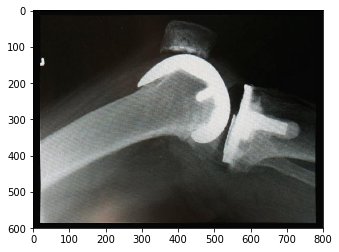

In [23]:
query_img = Image.open(image_path)
show_img(query_img)

In [24]:
counter = 10
fig, axes = plt.subplots(1, counter, figsize=(400, 200))
for idx, (imagename, sim_val) in enumerate(sim_list[:counter]):
#     print(idx)
    test_image_path = test_dir/(imagename+'.jpg')
#     print(image_path)
    img = Image.open(test_image_path)
    ax = show_img(img, ax= axes.flat[idx], title=f'sim_val:{sim_val:2f}') 